In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import calendar
import string
from string import punctuation
from itertools import chain

from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, f1_score

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_selection import SelectPercentile, chi2, f_regression, f_classif

from sklearn import svm
from sklearn.utils import shuffle

df = pd.read_csv('Downloads/Port of Spain.csv', index_col=0, encoding='latin1')  #load csv

In [5]:
df.shape

(7637, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7637 entries, 2000-01-01 to 2020-12-31
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   humidity                 7637 non-null   float64
 1   precipcover              7637 non-null   float64
 2   windspeed                7637 non-null   float64
 3   cloudcover               7637 non-null   float64
 4   visibility               7637 non-null   float64
 5   sunrise_time             7637 non-null   object 
 6   sunset_time              7637 non-null   object 
 7   Port of Spain precip mm  7637 non-null   float64
 8   tempmax c                7637 non-null   float64
 9   tempmin c                7637 non-null   float64
 10  avgtemp c                7637 non-null   float64
 11  feelslikemax c           7637 non-null   float64
 12  feelslikemin c           7637 non-null   float64
 13  avgfeelsliketemp c       7637 non-null   float64
 14  dewpoint c    

In [9]:
df.head(10)

,humidity,precipcover,windspeed,cloudcover,visibility,sunrise_time,sunset_time,Port of Spain precip mm,tempmax c,tempmin c,avgtemp c,feelslikemax c,feelslikemin c,avgfeelsliketemp c,dewpoint c
datetime,,,,,,,,,,,,,,,
2000-01-01,78.0,0.0,15.0,43.8,7.6,06:24:06,17:54:48,9.77900,31.1,22.1,26.7,34.7,22.1,28.2,22.2
2000-01-02,83.7,0.0,16.1,57.9,8.2,06:24:30,17:55:20,2.10185,31.1,21.8,25.7,35.6,21.8,26.9,22.5
2000-01-03,78.6,0.0,12.8,73.2,9.5,06:24:53,17:55:53,4.90220,32.1,23.1,26.3,35.0,23.1,27.3,22.0
2000-01-04,84.9,0.0,13.9,77.7,9.7,06:25:16,17:56:26,10.25525,29.1,21.8,24.5,32.1,21.8,25.1,21.6
2000-01-05,93.0,0.0,11.4,76.0,8.2,06:25:37,17:56:59,0.69850,27.3,22.8,24.5,30.4,22.8,24.7,23.3
2000-01-06,86.7,0.0,18.3,80.0,6.8,06:25:58,17:57:31,0.50165,31.1,23.1,25.5,35.6,23.1,26.5,23.0
2000-01-07,83.4,0.0,15.0,64.2,7.4,06:26:18,17:58:04,2.80035,30.8,23.1,25.2,33.8,23.1,25.8,21.9
2000-01-08,75.8,0.0,13.9,42.2,8.4,06:26:38,17:58:36,6.22300,31.1,22.7,26.5,33.8,22.7,27.6,21.4
2000-01-09,82.3,0.0,16.1,51.4,7.1,06:26:56,17:59:09,0.74930,31.1,22.1,25.8,35.2,22.1,27.4,22.4


In [11]:
df.describe()

,humidity,precipcover,windspeed,cloudcover,visibility,Port of Spain precip mm,tempmax c,tempmin c,avgtemp c,feelslikemax c,feelslikemin c,avgfeelsliketemp c,dewpoint c
count,7637.000000,7637.000000,7637.000000,7637.000000,7637.000000,7637.000000,7637.000000,7637.000000,7637.000000,7637.000000,7637.000000,7637.000000,7637.000000
mean,80.131793,5.225413,15.349758,60.136651,7.109794,4.830351,31.693990,23.755663,27.047597,36.408367,23.758583,28.916381,23.029842
std,6.116863,14.130285,4.611617,18.650294,1.017474,10.295083,1.660142,1.279496,1.091748,2.767528,1.289896,1.884946,1.292786
min,57.200000,0.000000,0.000000,17.500000,2.700000,0.000000,22.100000,2.900000,21.700000,22.100000,2.900000,21.700000,17.300000
25%,75.700000,0.000000,12.800000,43.500000,6.500000,0.000000,31.000000,23.000000,26.300000,34.600000,23.000000,27.500000,22.200000
50%,79.800000,0.000000,15.000000,58.300000,7.000000,0.787400,32.000000,24.000000,27.100000,36.600000,24.000000,28.900000,23.300000
75%,84.500000,4.170000,17.200000,77.100000,7.600000,5.105400,33.000000,24.800000,27.900000,38.100000,24.800000,30.300000,24.100000
max,99.300000,100.000000,118.600000,100.000000,16.800000,156.006800,58.900000,27.200000,30.100000,58.900000,30.600000,34.800000,25.700000


In [13]:
df.isna()

,humidity,precipcover,windspeed,cloudcover,visibility,sunrise_time,sunset_time,Port of Spain precip mm,tempmax c,tempmin c,avgtemp c,feelslikemax c,feelslikemin c,avgfeelsliketemp c,dewpoint c
datetime,,,,,,,,,,,,,,,
2000-01-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2000-01-02,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2000-01-03,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2000-01-04,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2000-01-05,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2020-12-28,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2020-12-29,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
df.isna().sum()

humidity                   0
precipcover                0
windspeed                  0
cloudcover                 0
visibility                 0
sunrise_time               0
sunset_time                0
Port of Spain precip mm    0
tempmax c                  0
tempmin c                  0
avgtemp c                  0
feelslikemax c             0
feelslikemin c             0
avgfeelsliketemp c         0
dewpoint c                 0
dtype: int64

In [17]:
df.apply(pd.isnull).sum()

humidity                   0
precipcover                0
windspeed                  0
cloudcover                 0
visibility                 0
sunrise_time               0
sunset_time                0
Port of Spain precip mm    0
tempmax c                  0
tempmin c                  0
avgtemp c                  0
feelslikemax c             0
feelslikemin c             0
avgfeelsliketemp c         0
dewpoint c                 0
dtype: int64

In [19]:
df.dtypes

humidity                   float64
precipcover                float64
windspeed                  float64
cloudcover                 float64
visibility                 float64
sunrise_time                object
sunset_time                 object
Port of Spain precip mm    float64
tempmax c                  float64
tempmin c                  float64
avgtemp c                  float64
feelslikemax c             float64
feelslikemin c             float64
avgfeelsliketemp c         float64
dewpoint c                 float64
dtype: object

In [21]:
df.drop(columns=['sunrise_time'],inplace=True)
df.drop(columns=['sunset_time'],inplace=True)
df.dtypes

humidity                   float64
precipcover                float64
windspeed                  float64
cloudcover                 float64
visibility                 float64
Port of Spain precip mm    float64
tempmax c                  float64
tempmin c                  float64
avgtemp c                  float64
feelslikemax c             float64
feelslikemin c             float64
avgfeelsliketemp c         float64
dewpoint c                 float64
dtype: object

In [23]:
df.index

Index(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04', '2000-01-05',
       '2000-01-06', '2000-01-07', '2000-01-08', '2000-01-09', '2000-01-10',
       ...
       '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25', '2020-12-26',
       '2020-12-27', '2020-12-28', '2020-12-29', '2020-12-30', '2020-12-31'],
      dtype='object', name='datetime', length=7637)

In [25]:
df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='datetime', length=7637, freq=None)

## Feature Engineering

In [28]:
# Function to compute Heat Index in Celsius
def compute_heat_index_celsius(temp_C, humidity):
    # Convert Celsius to Fahrenheit
    temp_F = (temp_C * 9/5) + 32

    # Compute Heat Index in Fahrenheit using NOAA formula
    HI_F = (-42.379 
            + 2.04901523 * temp_F 
            + 10.14333127 * humidity 
            - 0.22475541 * temp_F * humidity 
            - 0.00683783 * temp_F**2 
            - 0.05481717 * humidity**2 
            + 0.00122874 * temp_F**2 * humidity 
            + 0.00085282 * temp_F * humidity**2 
            - 0.00000199 * temp_F**2 * humidity**2)

    # Convert back to Celsius
    HI_C = (HI_F - 32) * 5/9
    return HI_C

# Apply the function to the dataframe
df['heat_index_C'] = df.apply(lambda row: compute_heat_index_celsius(row['avgtemp c'], row['humidity']), axis=1)

# Display results
print(df)

            humidity  precipcover  windspeed  cloudcover  visibility  \
datetime                                                               
2000-01-01      78.0         0.00       15.0        43.8         7.6   
2000-01-02      83.7         0.00       16.1        57.9         8.2   
2000-01-03      78.6         0.00       12.8        73.2         9.5   
2000-01-04      84.9         0.00       13.9        77.7         9.7   
2000-01-05      93.0         0.00       11.4        76.0         8.2   
...              ...          ...        ...         ...         ...   
2020-12-27      74.6         0.00       11.4        36.8         6.8   
2020-12-28      77.2         0.00        9.2        36.1         6.9   
2020-12-29      85.3         4.17        9.2        51.1         6.5   
2020-12-30      87.2         4.17        5.8        43.9         6.5   
2020-12-31      82.3         4.17       11.4        52.1         6.9   

            Port of Spain precip mm  tempmax c  tempmin c  avgt

In [30]:
df.head(10)

,humidity,precipcover,windspeed,cloudcover,visibility,Port of Spain precip mm,tempmax c,tempmin c,avgtemp c,feelslikemax c,feelslikemin c,avgfeelsliketemp c,dewpoint c,heat_index_C
datetime,,,,,,,,,,,,,,
2000-01-01,78.0,0.0,15.0,43.8,7.6,9.77900,31.1,22.1,26.7,34.7,22.1,28.2,22.2,28.936191
2000-01-02,83.7,0.0,16.1,57.9,8.2,2.10185,31.1,21.8,25.7,35.6,21.8,26.9,22.5,27.172234
2000-01-03,78.6,0.0,12.8,73.2,9.5,4.90220,32.1,23.1,26.3,35.0,23.1,27.3,22.0,28.182557
2000-01-04,84.9,0.0,13.9,77.7,9.7,10.25525,29.1,21.8,24.5,32.1,21.8,25.1,21.6,24.858485
2000-01-05,93.0,0.0,11.4,76.0,8.2,0.69850,27.3,22.8,24.5,30.4,22.8,24.7,23.3,24.403043
2000-01-06,86.7,0.0,18.3,80.0,6.8,0.50165,31.1,23.1,25.5,35.6,23.1,26.5,23.0,26.788875
2000-01-07,83.4,0.0,15.0,64.2,7.4,2.80035,30.8,23.1,25.2,33.8,23.1,25.8,21.9,26.183522
2000-01-08,75.8,0.0,13.9,42.2,8.4,6.22300,31.1,22.7,26.5,33.8,22.7,27.6,21.4,28.398369
2000-01-09,82.3,0.0,16.1,51.4,7.1,0.74930,31.1,22.1,25.8,35.2,22.1,27.4,22.4,27.343458


## Visualizations

### How humidity affects dew point, especially at lower temperatures.

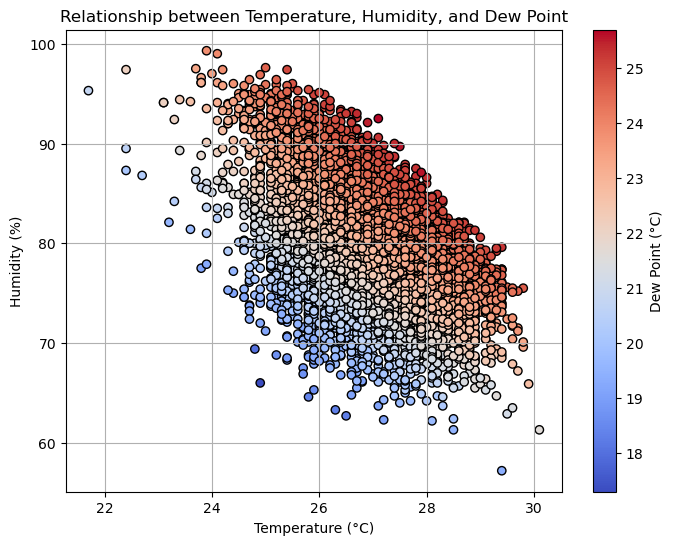

In [35]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['avgtemp c'], df['humidity'], c=df['dewpoint c'], cmap='coolwarm', edgecolors='black')
plt.colorbar(scatter, label='Dew Point (°C)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Relationship between Temperature, Humidity, and Dew Point')
plt.grid(True)
plt.show()

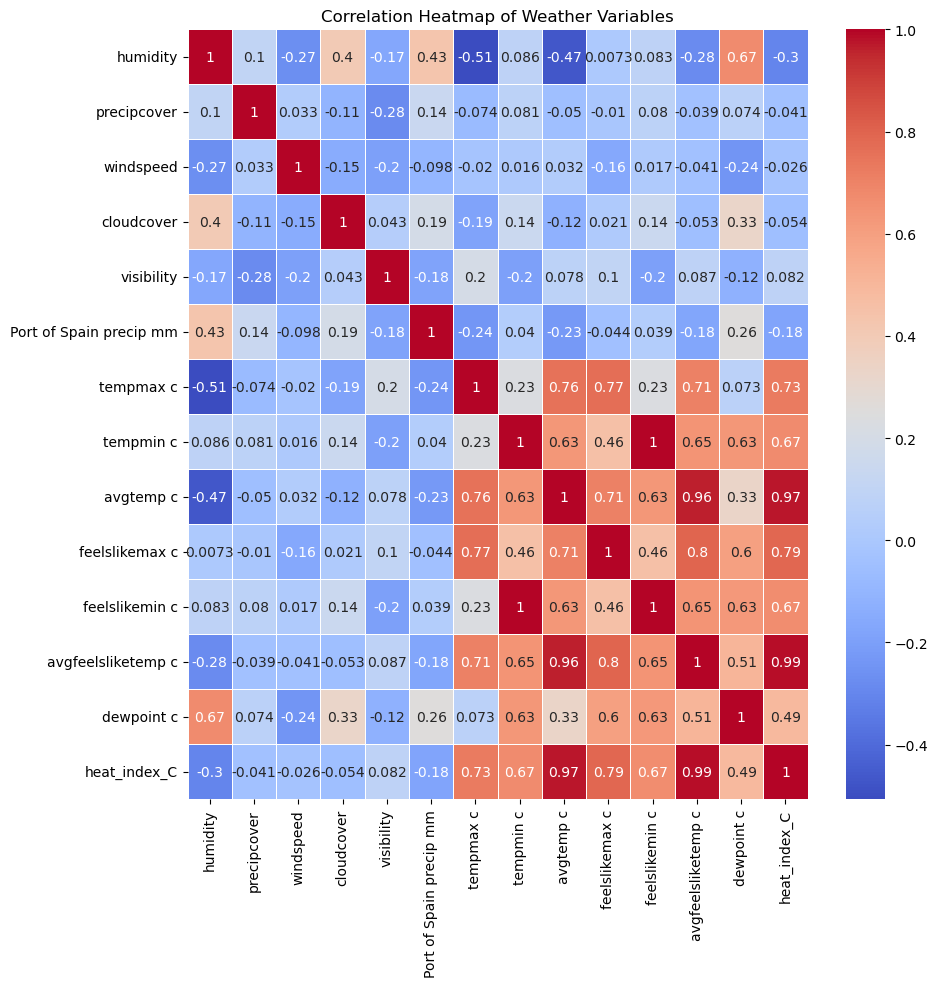

In [51]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Weather Variables")
plt.show()

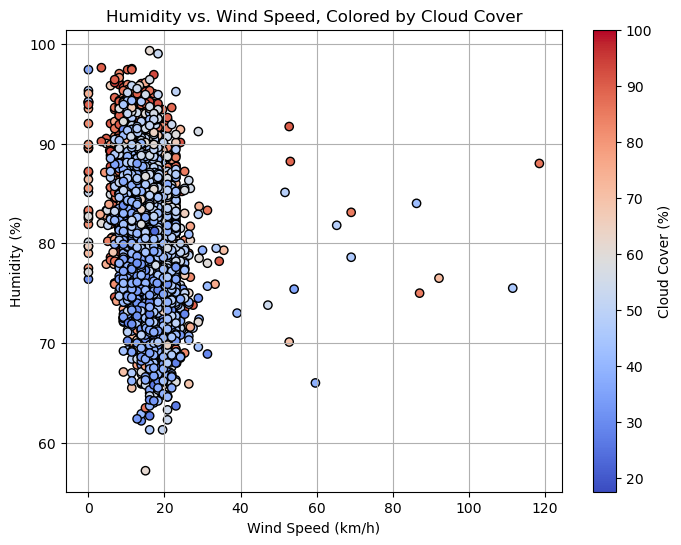

In [55]:
plt.figure(figsize=(8, 6))
plt.scatter(df['windspeed'], df['humidity'], c=df['cloudcover'], cmap='coolwarm', edgecolors='black')
plt.colorbar(label="Cloud Cover (%)")
plt.xlabel("Wind Speed (km/h)")
plt.ylabel("Humidity (%)")
plt.title("Humidity vs. Wind Speed, Colored by Cloud Cover")
plt.grid(True)
plt.show()

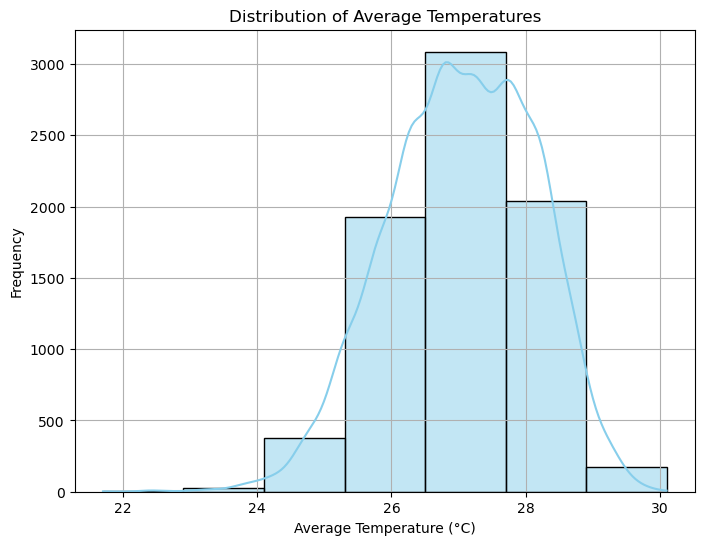

In [69]:
#visualizes how average temperature is distributed.
plt.figure(figsize=(8, 6))
sns.histplot(df['avgtemp c'], bins=7, kde=True, color='skyblue')
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Frequency")
plt.title("Distribution of Average Temperatures")
plt.grid(True)
plt.show()

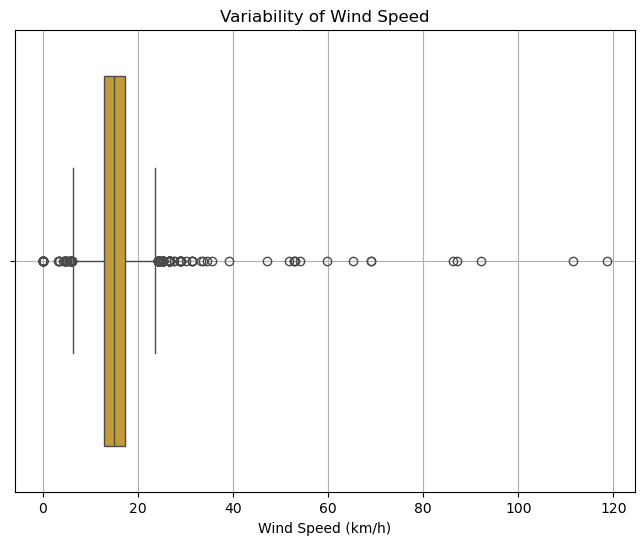

In [71]:
#Shows range, median, and outliers in wind speed.
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['windspeed'], color='goldenrod')
plt.xlabel("Wind Speed (km/h)")
plt.title("Variability of Wind Speed")
plt.grid(True)
plt.show()

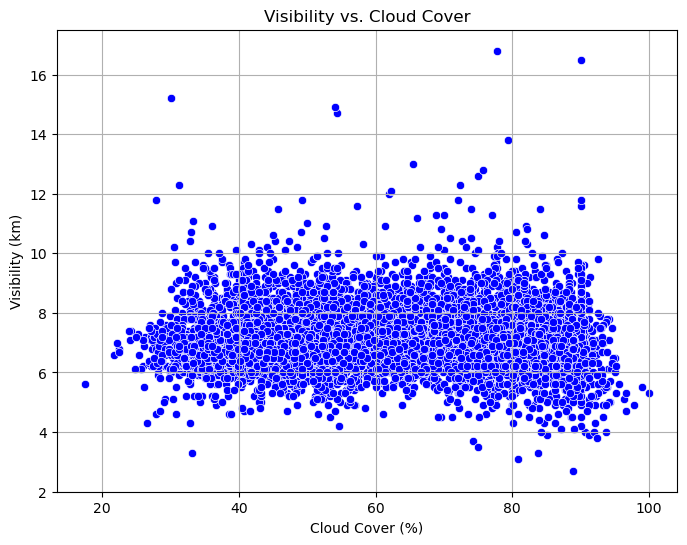

In [73]:
#Shows whether increased cloud cover reduces visibility. Helps analyze foggy/cloudy weather trends.
#Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['cloudcover'], y=df['visibility'], color="blue")

plt.xlabel("Cloud Cover (%)")
plt.ylabel("Visibility (km)")
plt.title("Visibility vs. Cloud Cover")
plt.grid(True)
plt.show()

In [ ]:
#Plots rainfall in POS (mm) and precipitation cover (%) side by side. Helps identify heavy rain periods and coverage.
plt.figure(figsize=(10, 5))
plt.plot(df['datetime'], df['precip_mm'], label="Rainfall (mm)", marker='o', linestyle='-')
plt.plot(df['datetime'], df['precipcover'], label="Precipitation Cover (%)", marker='s', linestyle='--')

plt.xlabel("Date")
plt.ylabel("Rainfall / Precipitation Cover")
plt.title("Rainfall Analysis Over Time")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

## Linear Regression Model

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Define features & target
X = df[['humidity', 'precipcover', 'windspeed', 'cloudcover', 'visibility']]
y = df['avgtemp c']

# Train-test split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
# Initialize & Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Absolute Error: 0.75
R-squared Score: 0.26


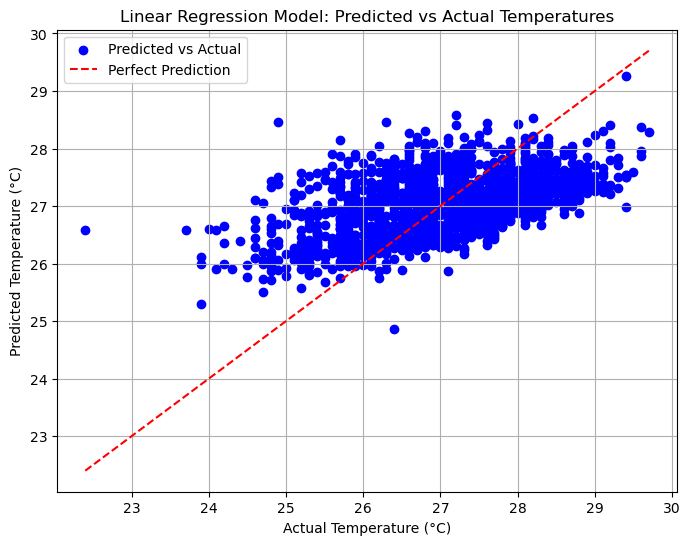

In [81]:
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')

plt.xlabel("Actual Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.title("Linear Regression Model: Predicted vs Actual Temperatures")
plt.legend()
plt.grid(True)
plt.show()

## Random Forest Model

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Define features & target variable
X = df[['humidity', 'precipcover', 'windspeed', 'cloudcover', 'visibility']]
y = df['avgtemp c']

# Train-test split; Training (80%), Testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Absolute Error: 0.71
R-squared Score: 0.29


In [85]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],         # Number of trees
    'max_depth': [None, 10, 20],            # Depth of each tree
    'min_samples_split': [2, 5, 10],        # Minimum samples needed to split
    'min_samples_leaf': [1, 2, 4],          # Minimum samples per leaf
}

# Initialize model
rf = RandomForestRegressor(random_state=42)

# Grid Search for best parameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

# Best parameters found
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Train model with best parameters
best_model = grid_search.best_estimator_

# Predictions & evaluation
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Optimized Mean Absolute Error: {mae:.2f}")
print(f"Optimized R-squared Score: {r2:.2f}")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Optimized Mean Absolute Error: 0.69
Optimized R-squared Score: 0.33


## Creation of Linear and Random Forest Model Together to get Comparision

In [87]:
# Define features & target
X = df[['humidity', 'precipcover', 'windspeed', 'cloudcover', 'visibility']]
y = df['avgtemp c']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Models
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Linear Regression: MAE = {mae_linear:.2f}, R² = {r2_linear:.2f}")
print(f"Random Forest: MAE = {mae_rf:.2f}, R² = {r2_rf:.2f}")

Linear Regression: MAE = 0.75, R² = 0.26
Random Forest: MAE = 0.71, R² = 0.29


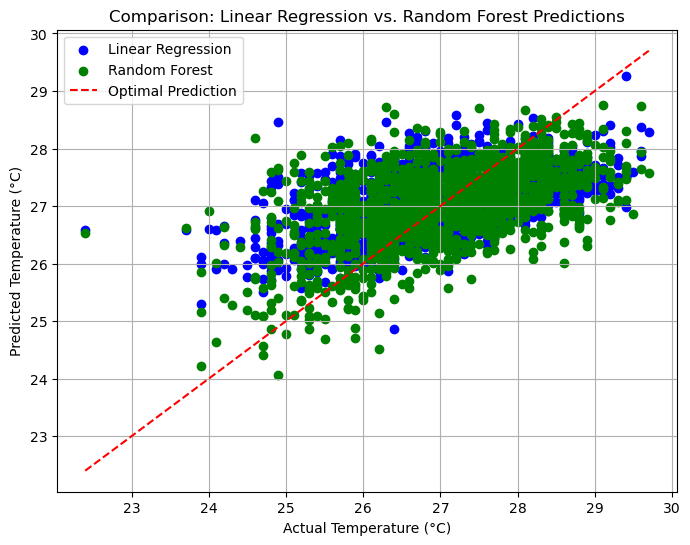

In [89]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, color='blue', label="Linear Regression")
plt.scatter(y_test, y_pred_rf, color='green', label="Random Forest")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label="Optimal Prediction")

plt.xlabel("Actual Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.title("Comparison: Linear Regression vs. Random Forest Predictions")
plt.legend()
plt.grid(True)
plt.show()